Se importan las librerías.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
%matplotlib inline
sns.set(style="ticks")


# Importamos DataSet

In [2]:
ecommerce=pd.read_csv('2019-Oct.csv')
ecommerce.head(10)

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2019-10-01 00:00:00 UTC,view,44600062,2103807459595387724,NaN,shiseido,35.79,541312140,72d76fde-8bb3-4e00-8c23-a032dfed738c
1,2019-10-01 00:00:00 UTC,view,3900821,2053013552326770905,appliances.environment.water_heater,aqua,33.20,554748717,9333dfbd-b87a-4708-9857-6336556b0fcc
2,2019-10-01 00:00:01 UTC,view,17200506,2053013559792632471,furniture.living_room.sofa,NaN,543.10,519107250,566511c2-e2e3-422b-b695-cf8e6e792ca8
3,2019-10-01 00:00:01 UTC,view,1307067,2053013558920217191,computers.notebook,lenovo,251.74,550050854,7c90fc70-0e80-4590-96f3-13c02c18c713
4,2019-10-01 00:00:04 UTC,view,1004237,2053013555631882655,electronics.smartphone,apple,1081.98,535871217,c6bd7419-2748-4c56-95b4-8cec9ff8b80d
5,2019-10-01 00:00:05 UTC,view,1480613,2053013561092866779,computers.desktop,pulser,908.62,512742880,0d0d91c2-c9c2-4e81-90a5-86594dec0db9
6,2019-10-01 00:00:08 UTC,view,17300353,2053013553853497655,NaN,creed,380.96,555447699,4fe811e9-91de-46da-90c3-bbd87ed3a65d
7,2019-10-01 00:00:08 UTC,view,31500053,2053013558031024687,NaN,luminarc,41.16,550978835,6280d577-25c8-4147-99a7-abc6048498d6
8,2019-10-01 00:00:10 UTC,view,28719074,2053013565480109009,apparel.shoes.keds,baden,102.71,520571932,ac1cd4e5-a3ce-4224-a2d7-ff660a105880
9,2019-10-01 00:00:11 UTC,view,1004545,2053013555631882655,electronics.smartphone,huawei,566.01,537918940,406c46ed-90a4-4787-a43b-59a410c1a5fb


# Creamos una variable del DataSet sin columnas innecesarias (ecommerce_limpio).


In [4]:
#Eliminamos las columnas random
ecommerce_limpio=ecommerce.drop(['product_id', 'category_id', 'user_id', 'user_session'], axis=1)
ecommerce_limpio

,event_time,event_type,category_code,brand,price
0,2019-10-01 00:00:00 UTC,view,NaN,shiseido,35.79
1,2019-10-01 00:00:00 UTC,view,appliances.environment.water_heater,aqua,33.20
2,2019-10-01 00:00:01 UTC,view,furniture.living_room.sofa,NaN,543.10
3,2019-10-01 00:00:01 UTC,view,computers.notebook,lenovo,251.74
4,2019-10-01 00:00:04 UTC,view,electronics.smartphone,apple,1081.98
...,...,...,...,...,...
42448759,2019-10-31 23:59:58 UTC,view,electronics.camera.video,gopro,527.40
42448760,2019-10-31 23:59:58 UTC,view,NaN,redmond,61.75
42448761,2019-10-31 23:59:58 UTC,view,auto.accessories.player,kenwood,128.70
42448762,2019-10-31 23:59:59 UTC,view,electronics.clocks,tissot,689.85


# Debido a que tenemos más de 42 millones de filas, creamos un DataSet más pequeño para hacer pruebas (ecommerce_pruebas).

In [4]:
#Éste dataframe es para hacer pruebas.
ecommerce_pruebas = ecommerce_limpio.iloc[:260]
ecommerce_pruebas

,event_time,event_type,category_code,brand,price
0,2019-10-01 00:00:00 UTC,view,NaN,shiseido,35.79
1,2019-10-01 00:00:00 UTC,view,appliances.environment.water_heater,aqua,33.20
2,2019-10-01 00:00:01 UTC,view,furniture.living_room.sofa,NaN,543.10
3,2019-10-01 00:00:01 UTC,view,computers.notebook,lenovo,251.74
4,2019-10-01 00:00:04 UTC,view,electronics.smartphone,apple,1081.98
...,...,...,...,...,...
255,2019-10-01 00:03:38 UTC,view,NaN,vitek,12.84
256,2019-10-01 00:03:39 UTC,view,electronics.smartphone,oneplus,746.22
257,2019-10-01 00:03:41 UTC,view,appliances.kitchen.microwave,ava,53.23
258,2019-10-01 00:03:42 UTC,view,electronics.smartphone,apple,1415.48


# Creamos otro DataSet eliminando las filas con valores nulos (ecommerce_limpio_nan).

In [5]:
#Eliminamos las filas con valores nulos (NaN)
ecommerce_limpio_nan = ecommerce_limpio.dropna()
ecommerce_limpio_nan

,event_time,event_type,category_code,brand,price
1,2019-10-01 00:00:00 UTC,view,appliances.environment.water_heater,aqua,33.20
3,2019-10-01 00:00:01 UTC,view,computers.notebook,lenovo,251.74
4,2019-10-01 00:00:04 UTC,view,electronics.smartphone,apple,1081.98
5,2019-10-01 00:00:05 UTC,view,computers.desktop,pulser,908.62
8,2019-10-01 00:00:10 UTC,view,apparel.shoes.keds,baden,102.71
...,...,...,...,...,...
42448757,2019-10-31 23:59:58 UTC,view,electronics.smartphone,samsung,275.25
42448758,2019-10-31 23:59:58 UTC,view,appliances.kitchen.refrigerators,lg,527.43
42448759,2019-10-31 23:59:58 UTC,view,electronics.camera.video,gopro,527.40
42448761,2019-10-31 23:59:58 UTC,view,auto.accessories.player,kenwood,128.70


In [6]:
nada='nada'
#nada
nada

'nada'

# 1. Total de visualizaciones, productos añadidos al carrito y los que se han comprado.

In [33]:
#Total de visualizaciones, productos añadidos al carrito y los que se han comprado.
(ecommerce_limpio['event_type'].value_counts())

view        40779399
cart          926516
purchase      742849
Name: event_type, dtype: int64

In [53]:
df_total_actividad=pd.DataFrame({'tipos': ['view', 'cart', 'purchase'], 'numeros': [40779399.0, 926516.0, 742849.0]})
df_total_actividad

,tipos,numeros
0,view,40779399.0
1,cart,926516.0
2,purchase,742849.0


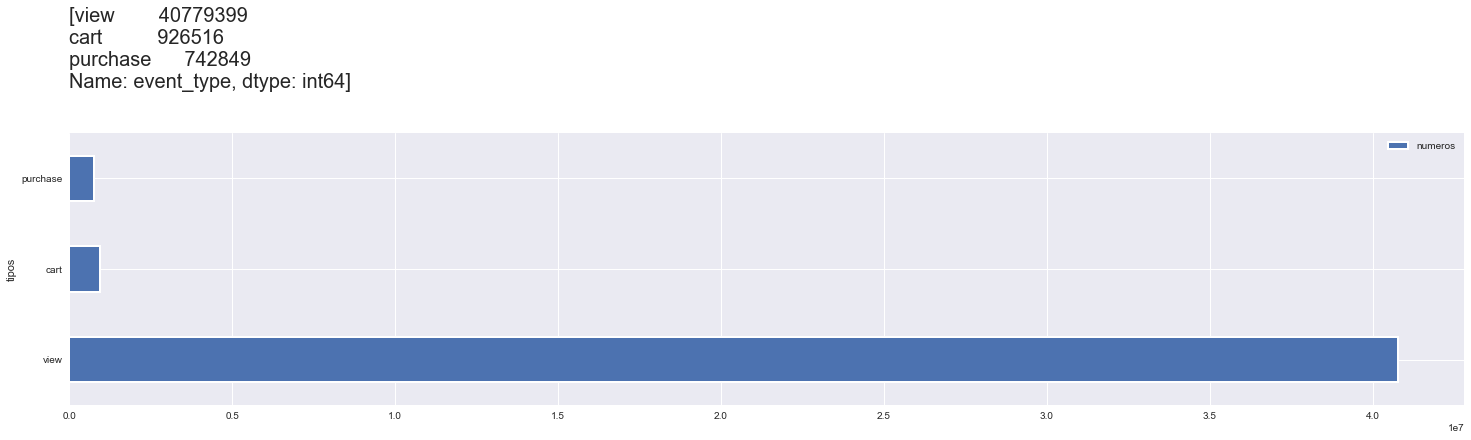

In [80]:
valores=[(ecommerce_limpio['event_type'].value_counts())]
plt.style.use('seaborn')
df_total_actividad.plot(x='tipos', y='numeros', kind = 'barh', figsize=(25,5), linewidth=2)
plt.text(x = 3 , y = 3, s = valores, size = 20)
plt.show()

# 2. Lista de los productos más comprados y los que menos.

In [82]:
#DataFrame SÓLO con compras (purchase) sin valores nulos.
compras = ecommerce_limpio_nan['event_type'] == 'purchase'
df_compras = ecommerce_limpio_nan[compras]
df_compras


,event_time,event_type,category_code,brand,price
162,2019-10-01 00:02:14 UTC,purchase,electronics.smartphone,samsung,130.76
308,2019-10-01 00:04:37 UTC,purchase,electronics.smartphone,apple,642.69
442,2019-10-01 00:07:07 UTC,purchase,furniture.bathroom.toilet,santeri,54.42
574,2019-10-01 00:09:26 UTC,purchase,electronics.audio.headphone,apple,189.91
603,2019-10-01 00:09:54 UTC,purchase,electronics.audio.headphone,apple,161.98
...,...,...,...,...,...
42447959,2019-10-31 23:53:53 UTC,purchase,electronics.smartphone,samsung,242.63
42448173,2019-10-31 23:55:21 UTC,purchase,construction.tools.light,puckator,20.59
42448271,2019-10-31 23:56:03 UTC,purchase,electronics.smartphone,apple,577.89
42448362,2019-10-31 23:56:53 UTC,purchase,electronics.smartphone,apple,1054.60


In [83]:
#Usamos la librería collections para usar la clase counter, que nos permite contar cada producto vendido con el mismo nombre. Quitamos los productos con valores nulos.
x = df_compras.category_code
productos_vendidos = Counter(x)
productos_vendidos 


Counter({'electronics.smartphone': 337575,
         'furniture.bathroom.toilet': 163,
         'electronics.audio.headphone': 30439,
         'appliances.environment.air_heater': 2091,
         'auto.accessories.videoregister': 1945,
         'computers.notebook': 15547,
         'computers.peripherals.printer': 2491,
         'electronics.clocks': 16647,
         'apparel.shoes': 3398,
         'computers.components.hdd': 916,
         'appliances.kitchen.meat_grinder': 1920,
         'electronics.telephone': 3733,
         'appliances.kitchen.blender': 3043,
         'construction.tools.drill': 1810,
         'accessories.bag': 1100,
         'electronics.video.tv': 21548,
         'electronics.tablet': 5599,
         'appliances.kitchen.washer': 16059,
         'appliances.environment.vacuum': 12218,
         'appliances.environment.water_heater': 2694,
         'appliances.kitchen.refrigerators': 8871,
         'appliances.personal.hair_cutter': 1032,
         'appliances.kitchen.h

In [84]:
# convert the dictionary to a DataFrame
df_productos_vendidos = pd.DataFrame.from_dict(productos_vendidos, orient='index')
#Y ordenamos.
df_productos_vendidos = df_productos_vendidos[0].sort_values(ascending = False)
df_productos_vendidos.head(20)

electronics.smartphone                 337575
electronics.audio.headphone             30439
electronics.video.tv                    21548
electronics.clocks                      16647
appliances.kitchen.washer               16059
computers.notebook                      15547
appliances.environment.vacuum           12218
appliances.kitchen.refrigerators         8871
electronics.tablet                       5599
electronics.telephone                    3733
appliances.iron                          3647
appliances.kitchen.microwave             3638
apparel.shoes                            3398
computers.desktop                        3091
appliances.kitchen.blender               3043
appliances.kitchen.kettle                2976
auto.accessories.player                  2787
appliances.environment.water_heater      2694
electronics.audio.subwoofer              2509
computers.peripherals.printer            2491
Name: 0, dtype: int64

Text(0.5, 1.0, '10 productos más vendidos')

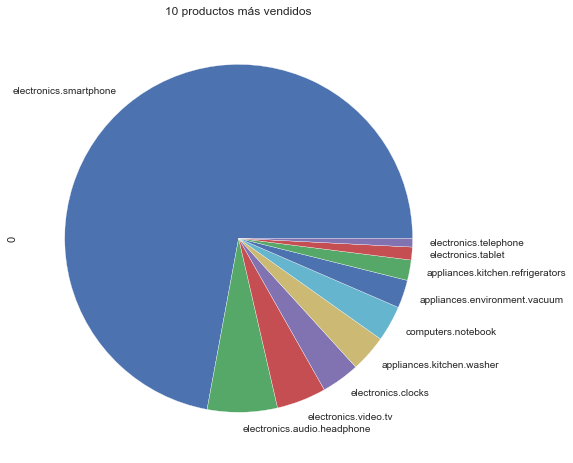

In [99]:
df_productos_vendidos.head(10).plot(kind='pie', subplots=True, figsize=(16,8))
plt.title("10 productos más vendidos")


In [11]:
df_productos_vendidos.tail(20)

appliances.environment.fan    26
auto.accessories.winch        26
accessories.umbrella          24
apparel.shoes.sandals         24
furniture.universal.light     21
sport.ski                     14
apparel.sock                  13
apparel.shoes.ballet_shoes    11
apparel.scarf                 10
apparel.trousers               9
apparel.dress                  9
apparel.shoes.slipons          5
sport.tennis                   4
apparel.belt                   4
sport.snowboard                4
apparel.skirt                  3
apparel.jeans                  3
apparel.shorts                 2
apparel.jumper                 2
apparel.jacket                 1
Name: 0, dtype: int64

Text(0.5, 1.0, '10 productos menos vendidos')

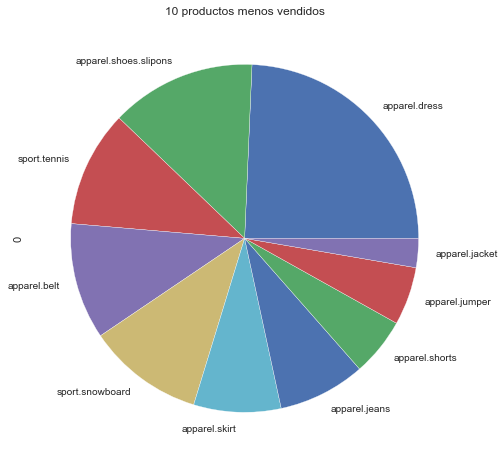

In [98]:
df_productos_vendidos.tail(10).plot(kind='pie', subplots=True, figsize=(16,8))
plt.title("10 productos menos vendidos")

# 3. Media del precio que gasta el consumidor en comprar un Smartphone.

In [88]:
#Filtramos en el dataframe de compras sólo los smartphones.
smartphones = df_compras['category_code'] == 'electronics.smartphone'
df_smartphones = df_compras[smartphones]
df_smartphones

,event_time,event_type,category_code,brand,price
162,2019-10-01 00:02:14 UTC,purchase,electronics.smartphone,samsung,130.76
308,2019-10-01 00:04:37 UTC,purchase,electronics.smartphone,apple,642.69
618,2019-10-01 00:10:08 UTC,purchase,electronics.smartphone,apple,515.67
860,2019-10-01 00:14:14 UTC,purchase,electronics.smartphone,vivo,463.31
1558,2019-10-01 02:19:10 UTC,purchase,electronics.smartphone,apple,736.18
...,...,...,...,...,...
42447449,2019-10-31 23:49:32 UTC,purchase,electronics.smartphone,apple,531.26
42447535,2019-10-31 23:50:16 UTC,purchase,electronics.smartphone,samsung,242.63
42447959,2019-10-31 23:53:53 UTC,purchase,electronics.smartphone,samsung,242.63
42448271,2019-10-31 23:56:03 UTC,purchase,electronics.smartphone,apple,577.89


In [89]:
#Calciulamos la media de los precios en smartphones.
media_precios_smartphones=df_smartphones["price"].mean()
media_precios_smartphones


464.3283594460684

# 4. Marcas más y menos demandadas en Smartphones.

In [90]:
#Vemos las marcas de los smartphones.
x = df_smartphones.brand
marcas_smartphones = Counter(x)
marcas_smartphones

Counter({'samsung': 143123,
         'apple': 115345,
         'vivo': 2025,
         'huawei': 21882,
         'xiaomi': 38776,
         'meizu': 1686,
         'nokia': 512,
         'oppo': 10891,
         'doogee': 89,
         'haier': 92,
         'inoi': 195,
         'oneplus': 509,
         'sony': 494,
         'tp-link': 375,
         'prestigio': 287,
         'fly': 46,
         'tecno': 95,
         'google': 27,
         'honor': 555,
         'zte': 173,
         'jinga': 43,
         'lg': 110,
         'bq': 92,
         'irbis': 7,
         'gionee': 33,
         'nubia': 5,
         'asus': 12,
         'blackberry': 8,
         'texet': 16,
         'htc': 43,
         'umi': 27,
         'micromax': 1,
         'philips': 1})

In [91]:
# convert the dictionary to a DataFrame
df_marcas_smartphones = pd.DataFrame.from_dict(marcas_smartphones, orient='index')
#Y ordenamos.
df_marcas_smartphones = df_marcas_smartphones[0].sort_values(ascending = False)
df_marcas_smartphones

samsung       143123
apple         115345
xiaomi         38776
huawei         21882
oppo           10891
vivo            2025
meizu           1686
honor            555
nokia            512
oneplus          509
sony             494
tp-link          375
prestigio        287
inoi             195
zte              173
lg               110
tecno             95
bq                92
haier             92
doogee            89
fly               46
jinga             43
htc               43
gionee            33
google            27
umi               27
texet             16
asus              12
blackberry         8
irbis              7
nubia              5
micromax           1
philips            1
Name: 0, dtype: int64

Text(0.5, 1.0, 'Top 5 marcas')

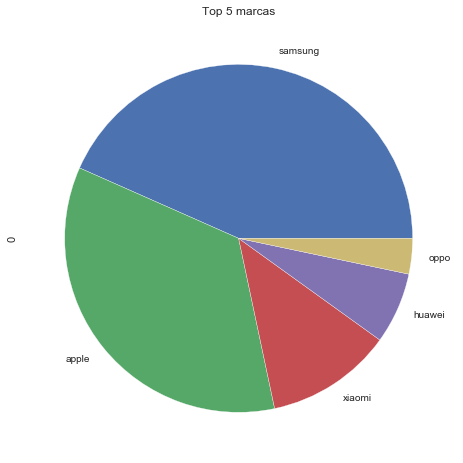

In [97]:
df_marcas_smartphones.head(5).plot(kind='pie', subplots=True, figsize=(16,8))
plt.title("Top 5 marcas")


# 5. ¿En qué días y horas hay más actividad en las plataformas de Ecommerce?

In [100]:
#DataFrame SÓLO con compras (purchase) CON valores nulos.
compras_nan = ecommerce_limpio['event_type'] == 'purchase'
df_compras_nan = ecommerce_limpio[compras_nan]
df_compras_nan

,event_time,event_type,category_code,brand,price
162,2019-10-01 00:02:14 UTC,purchase,electronics.smartphone,samsung,130.76
308,2019-10-01 00:04:37 UTC,purchase,electronics.smartphone,apple,642.69
379,2019-10-01 00:06:02 UTC,purchase,NaN,xiaomi,29.51
442,2019-10-01 00:07:07 UTC,purchase,furniture.bathroom.toilet,santeri,54.42
574,2019-10-01 00:09:26 UTC,purchase,electronics.audio.headphone,apple,189.91
...,...,...,...,...,...
42448148,2019-10-31 23:55:13 UTC,purchase,NaN,NaN,102.45
42448173,2019-10-31 23:55:21 UTC,purchase,construction.tools.light,puckator,20.59
42448271,2019-10-31 23:56:03 UTC,purchase,electronics.smartphone,apple,577.89
42448362,2019-10-31 23:56:53 UTC,purchase,electronics.smartphone,apple,1054.60


In [101]:
#DataFrame SÓLO con visualizaciones (views)
visualizaciones = ecommerce_limpio['event_type'] == 'view'
df_visualizaciones = ecommerce_limpio[visualizaciones]
df_visualizaciones

,event_time,event_type,category_code,brand,price
0,2019-10-01 00:00:00 UTC,view,NaN,shiseido,35.79
1,2019-10-01 00:00:00 UTC,view,appliances.environment.water_heater,aqua,33.20
2,2019-10-01 00:00:01 UTC,view,furniture.living_room.sofa,NaN,543.10
3,2019-10-01 00:00:01 UTC,view,computers.notebook,lenovo,251.74
4,2019-10-01 00:00:04 UTC,view,electronics.smartphone,apple,1081.98
...,...,...,...,...,...
42448759,2019-10-31 23:59:58 UTC,view,electronics.camera.video,gopro,527.40
42448760,2019-10-31 23:59:58 UTC,view,NaN,redmond,61.75
42448761,2019-10-31 23:59:58 UTC,view,auto.accessories.player,kenwood,128.70
42448762,2019-10-31 23:59:59 UTC,view,electronics.clocks,tissot,689.85


## Días y horas con más actividad en cuanto a COMPRAS

In [102]:
#Eliminamos la palabra UTC de las fechas/horas para que pandas pueda cogerlo como datatime en DF COMPRAS NAN.
df_compras_nan['event_time'] = df_compras_nan['event_time'].str.slice_replace(19, 24, '')
df_compras_nan.head()

C:\Users\fran2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,event_time,event_type,category_code,brand,price
162,2019-10-01 00:02:14,purchase,electronics.smartphone,samsung,130.76
308,2019-10-01 00:04:37,purchase,electronics.smartphone,apple,642.69
379,2019-10-01 00:06:02,purchase,NaN,xiaomi,29.51
442,2019-10-01 00:07:07,purchase,furniture.bathroom.toilet,santeri,54.42
574,2019-10-01 00:09:26,purchase,electronics.audio.headphone,apple,189.91


In [103]:
#Datetime
df_compras_nan['event_time']=pd.to_datetime(df_compras_nan['event_time'])
df_compras_nan.head()

C:\Users\fran2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,event_time,event_type,category_code,brand,price
162,2019-10-01 00:02:14,purchase,electronics.smartphone,samsung,130.76
308,2019-10-01 00:04:37,purchase,electronics.smartphone,apple,642.69
379,2019-10-01 00:06:02,purchase,NaN,xiaomi,29.51
442,2019-10-01 00:07:07,purchase,furniture.bathroom.toilet,santeri,54.42
574,2019-10-01 00:09:26,purchase,electronics.audio.headphone,apple,189.91


In [104]:
df_compras_nan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742849 entries, 162 to 42448657
Data columns (total 5 columns):
event_time       742849 non-null datetime64[ns]
event_type       742849 non-null object
category_code    569424 non-null object
brand            684544 non-null object
price            742849 non-null float64
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 34.0+ MB


In [105]:
df_compras_nan.set_index('event_time', inplace=True)
df_compras_nan.head()

,event_type,category_code,brand,price
event_time,,,,
2019-10-01 00:02:14,purchase,electronics.smartphone,samsung,130.76
2019-10-01 00:04:37,purchase,electronics.smartphone,apple,642.69
2019-10-01 00:06:02,purchase,NaN,xiaomi,29.51
2019-10-01 00:07:07,purchase,furniture.bathroom.toilet,santeri,54.42
2019-10-01 00:09:26,purchase,electronics.audio.headphone,apple,189.91


In [108]:
dias=df_compras_nan.resample('d').count()
dias

,event_type,category_code,brand,price
event_time,,,,
2019-10-01,19307,15198,17745,19307
2019-10-02,19469,15406,17818,19469
2019-10-03,19255,15113,17779,19255
2019-10-04,27041,21109,25271,27041
2019-10-05,23494,18172,21754,23494
2019-10-06,22171,17186,20490,22171
2019-10-07,21378,16035,19678,21378
2019-10-08,23072,16688,21082,23072
2019-10-09,22748,16541,20813,22748


In [110]:
dias['index1'] = dias.index
dias

,event_type,category_code,brand,price,index1
event_time,,,,,
2019-10-01,19307,15198,17745,19307,2019-10-01
2019-10-02,19469,15406,17818,19469,2019-10-02
2019-10-03,19255,15113,17779,19255,2019-10-03
2019-10-04,27041,21109,25271,27041,2019-10-04
2019-10-05,23494,18172,21754,23494,2019-10-05
2019-10-06,22171,17186,20490,22171,2019-10-06
2019-10-07,21378,16035,19678,21378,2019-10-07
2019-10-08,23072,16688,21082,23072,2019-10-08
2019-10-09,22748,16541,20813,22748,2019-10-09


In [112]:
z=dias.groupby([dias.index.day]).mean()
z

,event_type,category_code,brand,price
event_time,,,,
1,19307,15198,17745,19307
2,19469,15406,17818,19469
3,19255,15113,17779,19255
4,27041,21109,25271,27041
5,23494,18172,21754,23494
6,22171,17186,20490,22171
7,21378,16035,19678,21378
8,23072,16688,21082,23072
9,22748,16541,20813,22748


In [115]:
z['index1'] = z.index
z

,event_type,category_code,brand,price,index1
event_time,,,,,
1,19307,15198,17745,19307,1
2,19469,15406,17818,19469,2
3,19255,15113,17779,19255,3
4,27041,21109,25271,27041,4
5,23494,18172,21754,23494,5
6,22171,17186,20490,22171,6
7,21378,16035,19678,21378,7
8,23072,16688,21082,23072,8
9,22748,16541,20813,22748,9


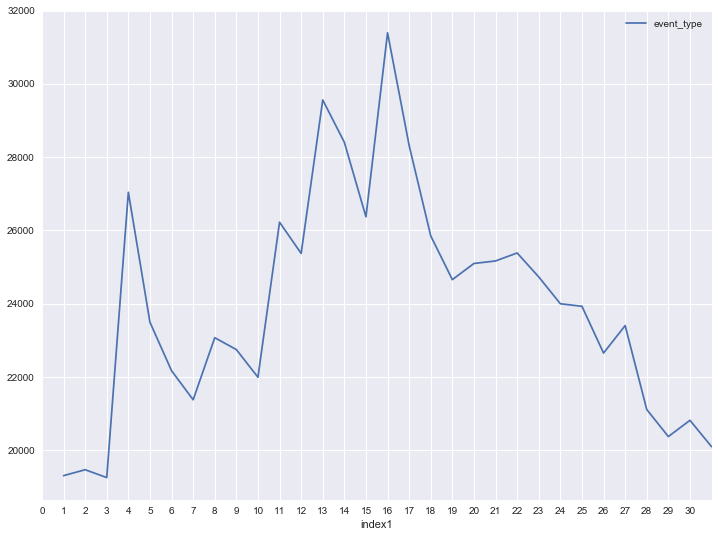

In [117]:
plt.style.use('seaborn')
z.plot(x='index1', y='event_type', kind = 'line', figsize=(12,9))
plt.xticks(np.arange(0,31,1))
plt.show()

# COMPRAS HORAS

In [119]:
df_compras_horas=df_compras_nan.resample('h').count()
df_compras_horas


,event_type,category_code,brand,price
event_time,,,,
2019-10-01 00:00:00,10,9,10,10
2019-10-01 01:00:00,0,0,0,0
2019-10-01 02:00:00,316,241,291,316
2019-10-01 03:00:00,845,652,764,845
2019-10-01 04:00:00,1021,792,938,1021
...,...,...,...,...
2019-10-31 19:00:00,481,362,433,481
2019-10-31 20:00:00,222,175,205,222
2019-10-31 21:00:00,187,151,170,187


In [121]:
x2=df_compras_horas.groupby([df_compras_horas.index.hour]).mean()
x2

,event_type,category_code,brand,price
event_time,,,,
0,95.129032,70.096774,86.612903,95.129032
1,178.258065,132.258065,162.645161,178.258065
2,450.580645,329.322581,412.580645,450.580645
3,955.935484,714.548387,879.580645,955.935484
4,1327.290323,998.419355,1221.580645,1327.290323
5,1550.677419,1181.838710,1429.741935,1550.677419
6,1677.580645,1284.645161,1550.290323,1677.580645
7,1722.774194,1329.580645,1596.580645,1722.774194
8,1780.548387,1378.032258,1646.806452,1780.548387


In [122]:
x2['index1'] = x2.index
x2

,event_type,category_code,brand,price,index1
event_time,,,,,
0,95.129032,70.096774,86.612903,95.129032,0
1,178.258065,132.258065,162.645161,178.258065,1
2,450.580645,329.322581,412.580645,450.580645,2
3,955.935484,714.548387,879.580645,955.935484,3
4,1327.290323,998.419355,1221.580645,1327.290323,4
5,1550.677419,1181.838710,1429.741935,1550.677419,5
6,1677.580645,1284.645161,1550.290323,1677.580645,6
7,1722.774194,1329.580645,1596.580645,1722.774194,7
8,1780.548387,1378.032258,1646.806452,1780.548387,8


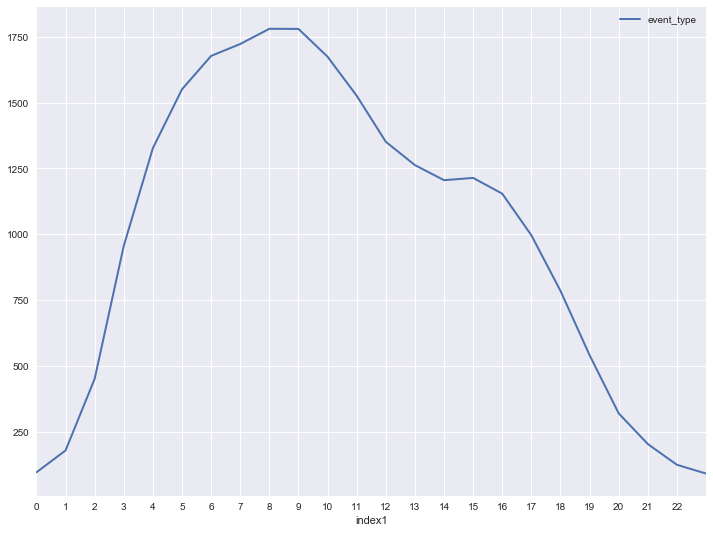

In [124]:
plt.style.use('seaborn')
x2.plot(x='index1', y='event_type', kind = 'line', figsize=(12,9), linewidth=2 )
plt.xticks(np.arange(0,23,1))
plt.show()

## Días y horas con más actividad en cuanto a VISUALIZACIONES

In [25]:
#Eliminamos la palabra UTC de las fechas/horas para que pandas pueda cogerlo como datatime.
df_visualizaciones['event_time'] = df_visualizaciones['event_time'].str.slice_replace(19, 24, '')
df_visualizaciones.head()

C:\Users\fran2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,event_time,event_type,category_code,brand,price
0,2019-10-01 00:00:00,view,NaN,shiseido,35.79
1,2019-10-01 00:00:00,view,appliances.environment.water_heater,aqua,33.20
2,2019-10-01 00:00:01,view,furniture.living_room.sofa,NaN,543.10
3,2019-10-01 00:00:01,view,computers.notebook,lenovo,251.74
4,2019-10-01 00:00:04,view,electronics.smartphone,apple,1081.98


In [27]:
#Datetime
df_visualizaciones['event_time']=pd.to_datetime(df_visualizaciones['event_time'])
df_visualizaciones.head()

C:\Users\fran2\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,event_time,event_type,category_code,brand,price
0,2019-10-01 00:00:00,view,NaN,shiseido,35.79
1,2019-10-01 00:00:00,view,appliances.environment.water_heater,aqua,33.20
2,2019-10-01 00:00:01,view,furniture.living_room.sofa,NaN,543.10
3,2019-10-01 00:00:01,view,computers.notebook,lenovo,251.74
4,2019-10-01 00:00:04,view,electronics.smartphone,apple,1081.98


In [28]:
df_visualizaciones.set_index('event_time', inplace=True)
df_visualizaciones.head()

,event_type,category_code,brand,price
event_time,,,,
2019-10-01 00:00:00,view,NaN,shiseido,35.79
2019-10-01 00:00:00,view,appliances.environment.water_heater,aqua,33.20
2019-10-01 00:00:01,view,furniture.living_room.sofa,NaN,543.10
2019-10-01 00:00:01,view,computers.notebook,lenovo,251.74
2019-10-01 00:00:04,view,electronics.smartphone,apple,1081.98


# DIAS VISUALIZACIONES

In [70]:
dias_visualizaciones=df_visualizaciones.resample('d').count()
dias_visualizaciones

,event_type,category_code,brand,price
event_time,,,,
2019-10-01,1208280,812223,1021959,1208280
2019-10-02,1154591,788338,981558,1154591
2019-10-03,1088725,750594,933136,1088725
2019-10-04,1346320,929995,1176295,1346320
2019-10-05,1271348,861363,1099165,1271348
2019-10-06,1264062,852836,1091378,1264062
2019-10-07,1161101,765211,992467,1161101
2019-10-08,1329119,825992,1124583,1329119
2019-10-09,1306363,826620,1108218,1306363


In [71]:
dias_visualizaciones['index1'] = dias_visualizaciones.index
dias_visualizaciones

,event_type,category_code,brand,price,index1
event_time,,,,,
2019-10-01,1208280,812223,1021959,1208280,2019-10-01
2019-10-02,1154591,788338,981558,1154591,2019-10-02
2019-10-03,1088725,750594,933136,1088725,2019-10-03
2019-10-04,1346320,929995,1176295,1346320,2019-10-04
2019-10-05,1271348,861363,1099165,1271348,2019-10-05
2019-10-06,1264062,852836,1091378,1264062,2019-10-06
2019-10-07,1161101,765211,992467,1161101,2019-10-07
2019-10-08,1329119,825992,1124583,1329119,2019-10-08
2019-10-09,1306363,826620,1108218,1306363,2019-10-09


In [86]:
y=dias_visualizaciones.groupby([dias_visualizaciones.index.day]).mean()
y

,event_type,category_code,brand
event_time,,,
1,1208280,812223,1021959
2,1154591,788338,981558
3,1088725,750594,933136
4,1346320,929995,1176295
5,1271348,861363,1099165
6,1264062,852836,1091378
7,1161101,765211,992467
8,1329119,825992,1124583
9,1306363,826620,1108218


In [87]:
y['index1'] = y.index
y

,event_type,category_code,brand,index1
event_time,,,,
1,1208280,812223,1021959,1
2,1154591,788338,981558,2
3,1088725,750594,933136,3
4,1346320,929995,1176295,4
5,1271348,861363,1099165,5
6,1264062,852836,1091378,6
7,1161101,765211,992467,7
8,1329119,825992,1124583,8
9,1306363,826620,1108218,9


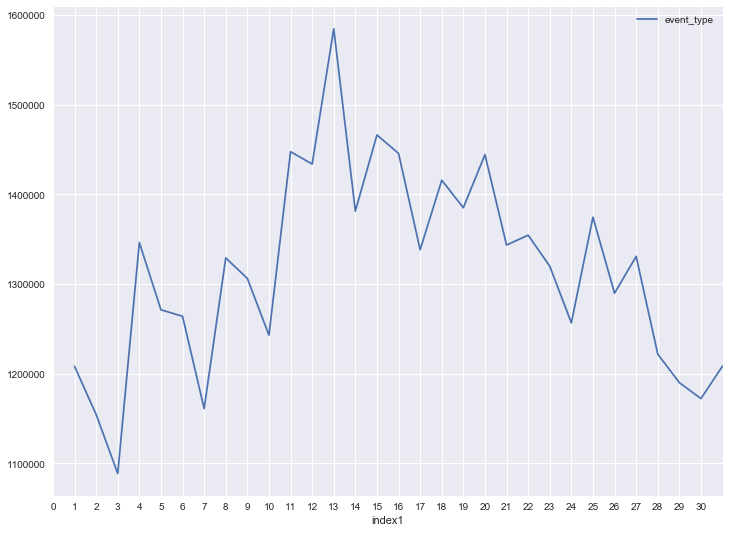

In [91]:
plt.style.use('seaborn')
y.plot(x='index1', y='event_type', kind = 'line', figsize=(12,9))
plt.xticks(np.arange(0,31,1))
plt.show()

# HORAS VISUALIZACIONES

In [37]:
df_quitar_dias=df_visualizaciones
df_quitar_dias.head()

,event_type,category_code,brand,price
event_time,,,,
2019-10-01 00:00:00,view,NaN,shiseido,35.79
2019-10-01 00:00:00,view,appliances.environment.water_heater,aqua,33.20
2019-10-01 00:00:01,view,furniture.living_room.sofa,NaN,543.10
2019-10-01 00:00:01,view,computers.notebook,lenovo,251.74
2019-10-01 00:00:04,view,electronics.smartphone,apple,1081.98


In [39]:
df_quitar_dias=df_quitar_dias.resample('h').count()
df_quitar_dias

,event_type,category_code,brand,price
event_time,,,,
2019-10-01 00:00:00,1070,680,915,1070
2019-10-01 01:00:00,121,84,105,121
2019-10-01 02:00:00,22326,14960,19143,22326
2019-10-01 03:00:00,47951,32363,40946,47951
2019-10-01 04:00:00,53390,35762,45466,53390
...,...,...,...,...
2019-10-31 19:00:00,40526,27285,34121,40526
2019-10-31 20:00:00,20795,14060,17738,20795
2019-10-31 21:00:00,12204,8325,10484,12204


In [45]:
x=df_quitar_dias.groupby([df_quitar_dias.index.hour]).mean()
x

,event_type,category_code,brand,price
event_time,,,,
0,9673.354839,6164.290323,8142.903226,9673.354839
1,17604.580645,11313.000000,14844.935484,17604.580645
2,33461.774194,21770.161290,28353.419355,33461.774194
3,47933.096774,31805.387097,40947.387097,47933.096774
4,58917.870968,39733.419355,50601.193548,58917.870968
5,65178.645161,44265.806452,55989.225806,65178.645161
6,69498.967742,47256.451613,59717.774194,69498.967742
7,71540.193548,48725.612903,61367.354839,71540.193548
8,73158.032258,49741.645161,62544.354839,73158.032258


In [50]:
x['index1'] = x.index
x

,event_type,category_code,brand,price,index1
event_time,,,,,
0,9673.354839,6164.290323,8142.903226,9673.354839,0
1,17604.580645,11313.000000,14844.935484,17604.580645,1
2,33461.774194,21770.161290,28353.419355,33461.774194,2
3,47933.096774,31805.387097,40947.387097,47933.096774,3
4,58917.870968,39733.419355,50601.193548,58917.870968,4
5,65178.645161,44265.806452,55989.225806,65178.645161,5
6,69498.967742,47256.451613,59717.774194,69498.967742,6
7,71540.193548,48725.612903,61367.354839,71540.193548,7
8,73158.032258,49741.645161,62544.354839,73158.032258,8


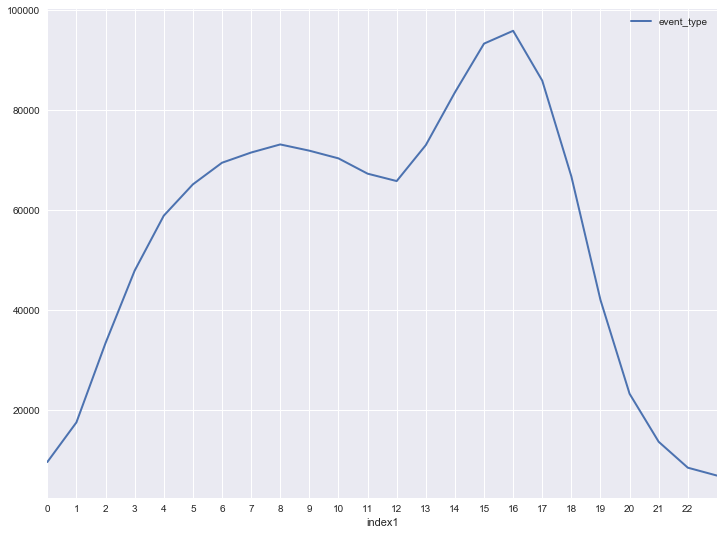

In [82]:
plt.style.use('seaborn')
x.plot(x='index1', y='event_type', kind = 'line', figsize=(12,9), linewidth=2 )
plt.xticks(np.arange(0,23,1))
plt.show()